In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
#import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

#import misc_util#correlation_plots

import R2h_module
#import imp
#imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

In [2]:
dfs_pair={}
def getdatainChunks(filename,treename):
    import pickle
    with open(filename, 'rb') as f:
        return pickle.load(f)[treename]

In [11]:
for target in "D C".split():
    dfs_pair["MC_"+target]=getdatainChunks(f"MC_pion_proton_pairs_weighted_{target}.pkl", target)
    def poly(a, coeffs):
        ret=0
        for i in range(len(coeffs)):
            ret=ret+coeffs[i]*a**i
        return ret
    df=dfs_pair[f'MC_{target}']
    p=df.h2_p#eval("sqrt(h2_E**2-0.09383**2)")
    T4=df.h2_T4
    coeffs_high_range1=120.251,-1168.19,5237.42,-13638.1,22325.3,-23649.6,16177.8,-6894.16,1663.4,-173.474
    coeffs_low_range1=-26.8257,153.155,-408.979,673.476,-790.433,708.255,-474.843,217.295,-58.6269,6.90981
    coeffs_high_range2=1.59223,-1.49056,0.676338,-0.104644
    coeffs_low_range2=-1.1009,0.719988,-0.280016,0.0319352
    df['pass_proton_TOF_cut']=((p>0.2)&(p<0.8)&(T4<poly(p,coeffs_high_range1))&(T4>poly(p,coeffs_low_range1)))|\
                  ((p>=0.8)&(p<2.8)&(T4<poly(p,coeffs_high_range2))&(T4>poly(p,coeffs_low_range2))) 


In [12]:
path_data="/media/eic_ucr/sebouh/di-hadron/P27"
path_data="/media/miguel/Elements/backup_07-27-23/nvme0n1p2/home/seba/di-hadron/P27/"
path_data="P27"
for target in ['C','Fe','Pb']:
    dfs_pair[target]=  getdatainChunks(f"data_pion_proton_pairs_{target}.pkl", target) 
dfs_pair['D']=pd.concat([getdatainChunks(f"data_pion_proton_pairs_{target}.pkl", 'D_%s'%target)  for target in ['C','Fe','Pb']])

In [13]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True, h2Proton=True)


key:  MC_D
Entries before cut  143494
Q2>1.0 and Q2<4.0 143494  (100.00  %)
0.2<h1_p<5.0  143494  (100.00  %)
inelasticity < 0.85 143494  (100.00  %)
h1_pid = pions (trigger) 143494  (100.00  %)
2.2 < nu <4.2 143494  (100.00  %)
10< h1_th 143494  (100.00  %)
Theta/P fiducial region selected for trigger hadron 143494  (100.00  %)
Nom cuts for the trigger applied 116889  (81.46  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 116889  (100.00  %)
2.2 < nu < 4.2 116889  (100.00  %)
secondary hadrons are protons 54896  (46.96  %)
leading hadrons are pions 54896  (100.00  %)
0.2<h2_p<5.0 54895  (100.00  %)
0.2<h1_p<5.0 54895  (100.00  %)
10<h2_th 53457  (97.38  %)
Theta/P fiducial region selected for secondary hadron 53457  (100.00  %)
10< h1_th 53457  (100.00  %)
Theta/P fiducial region selected for trigger hadron 53457  (100.00  %)
Nom cuts for the pair applied (pi p) 53050  (99.24  %)

key:  MC_C
Entries before cut  483923
Q2>1.0 and Q2<4.0 483923  (100.00  %)
0.2<h1_p

In [14]:
#print(<h2_T4)
# https://www.jlab.org/Hall-B/shifts/admin/paper_reviews/2012/TransparencyAnalysisNoteApproved-7233807-2012-10-03-v5.pdf
def poly(a, coeffs):
    ret=0
    for i in range(len(coeffs)):
        ret=ret+coeffs[i]*a**i
    return ret
ecorr_pars={"C":[0.00205, 0.000217, 0.0913],
    "Fe": [0.00205, 0.000218, 0.0911],
    "Pb": [0.00205, 0.000218, 0.0912],
    "D": [0.00208, 0.000255, 0.0886]}
for target in "D C".split():
    for a in f"{target} MC_{target}".split():
        df = dfs_pair[a]
        p=df.eval("sqrt((h2_z*nu)**2-0.9383**2)")
        T4=df.h2_T4
        coeffs_high_range1=120.251,-1168.19,5237.42,-13638.1,22325.3,-23649.6,16177.8,-6894.16,1663.4,-173.474
        coeffs_low_range1=-26.8257,153.155,-408.979,673.476,-790.433,708.255,-474.843,217.295,-58.6269,6.90981
        coeffs_high_range2=1.59223,-1.49056,0.676338,-0.104644
        coeffs_low_range2=-1.1009,0.719988,-0.280016,0.0319352
        df['pass_proton_TOF_cut']=((p>0.2)&(p<0.8)&(T4<poly(p,coeffs_high_range1))&(T4>poly(p,coeffs_low_range1)))|\
                      ((p>=0.8)&(p<2.8)&(T4<poly(p,coeffs_high_range2))&(T4>poly(p,coeffs_low_range2))) 
        #print(len(df.query('pass_proton_TOF_cut'))/len(df))
    
        #Or Hen had .0013, .00084,.074
        df.eval(f"h2_p_corr=sqrt((sqrt(h2_p**2+.9383**2)+{ecorr_pars[target][0]}+{ecorr_pars[target][1]}/({ecorr_pars[target][2]}+h2_p)**2)**2-.9383**2)", inplace=True)
        df.eval("h2_cm_pt_corr=h2_p_corr/h2_p*h2_cm_pt", inplace=True)
        df.eval("h2_rap_corr=(h2_rap+ycm)/abs(h2_rap+ycm)*0.5*log((sqrt(h2_p_corr**2+.9383**2)+sqrt(h2_p_corr**2-h2_cm_pt_corr**2))/"\
                +"(sqrt(h2_p_corr**2+.9383**2)-sqrt(h2_p_corr**2-h2_cm_pt_corr**2)))-ycm",inplace=True)
        df.eval("drap_corr=drap+h2_rap-h2_rap_corr", inplace=True)
    

In [15]:

pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==2212))'

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_")

pT1min=0.07
pT2min=0.07
pMin=0.35

q = f"{pThetaCuts_pair} and h1_pid==211   and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt_corr > {pT2min} and h1_z>0.5 and h2_pid==2212 and h2_p_corr>{pMin} and pass_proton_TOF_cut"

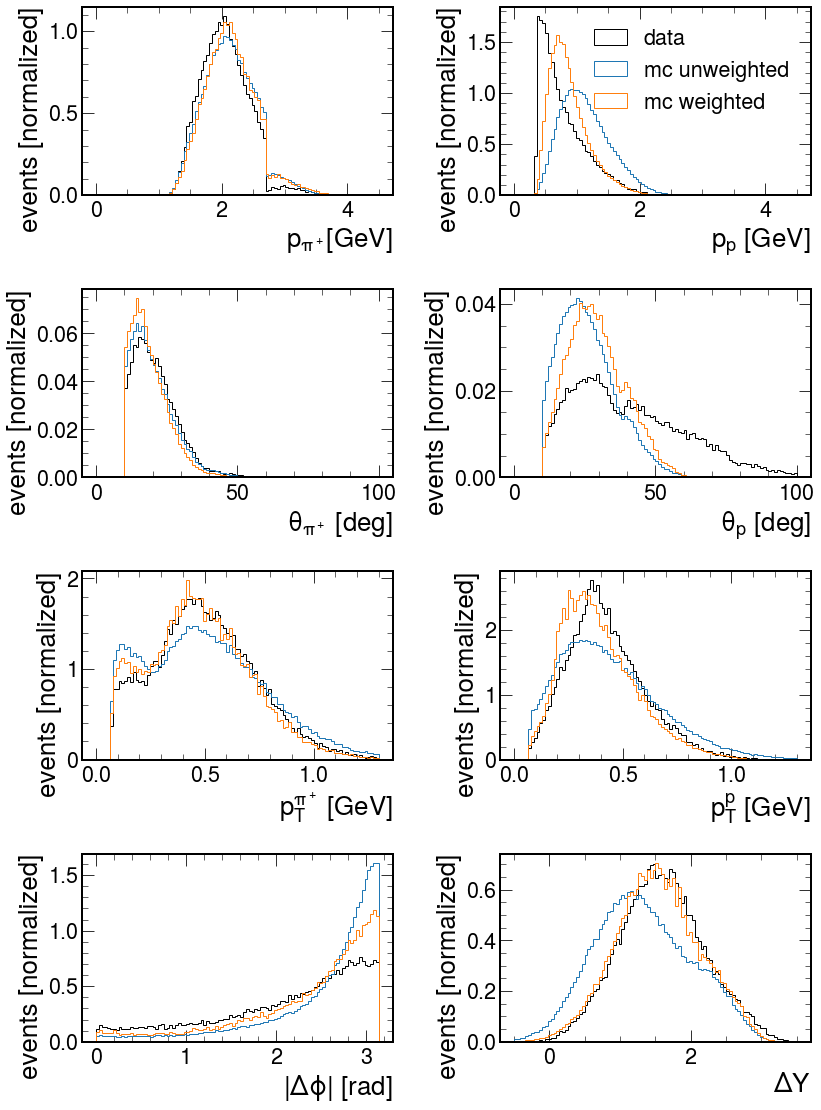

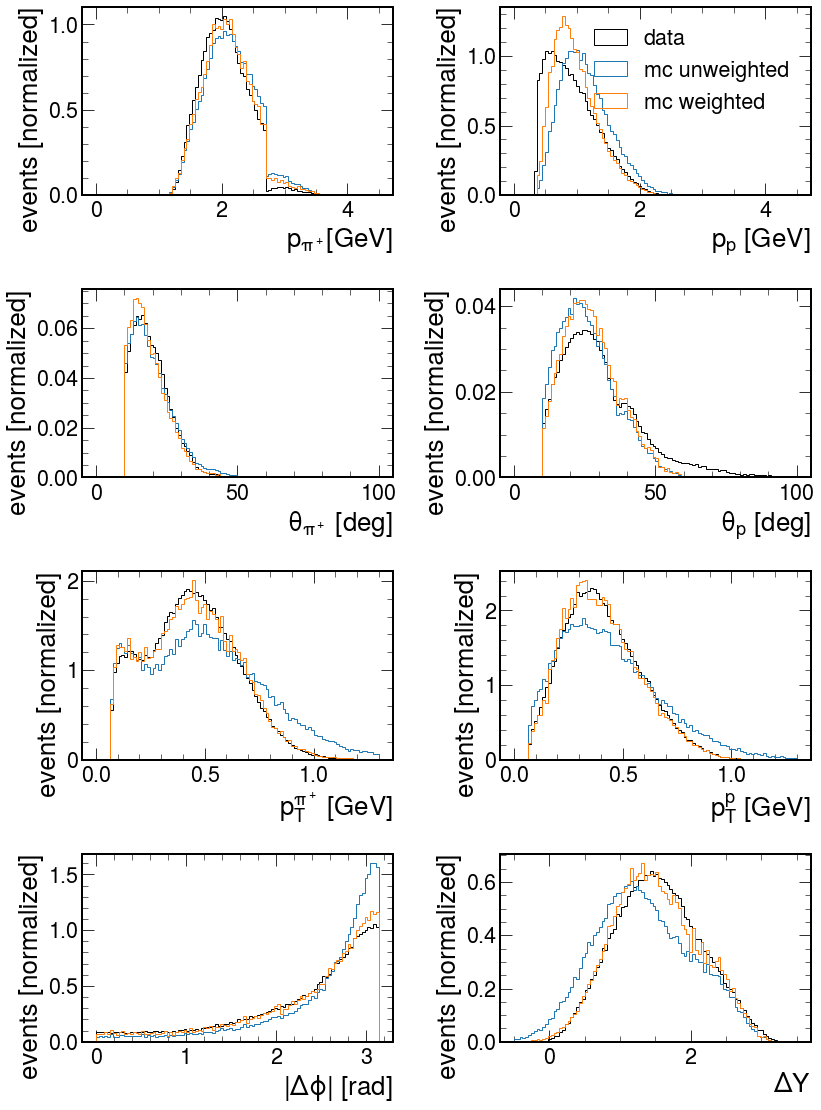

In [21]:
for target in "C D".split():
    dfs=[dfs_pair[target].query(q), dfs_pair[f"MC_{target}"].query(q),dfs_pair[f"MC_{target}"].query(q)]
    ylbl="events [normalized]"
    vars=[]
    vars.append(dict(xlbl="$p_{\\pi^+} [GeV]$",
        range=(0, 4.5),
        expr="h1_p"))
    vars.append(dict(xlbl="$p_{p}$ [GeV]",
        range=(0, 4.5),
        expr="h2_p_corr"))
    vars.append(dict(xlbl="$\\theta_{\\pi^+}$ [deg]",
        range=(0, 100),
        expr="h1_th"))
    vars.append(dict(xlbl="$\\theta_{p}$ [deg]",
        range=(0, 100),
        expr="h2_th"))
    vars.append(dict(xlbl="$p^{\\pi^+}_T$ [GeV]",
        range=(0, 1.3),
        expr="h1_cm_pt"))
    vars.append(dict(xlbl="$p^{p}_T$ [GeV]",
        range=(0, 1.3),
        expr="h2_cm_pt_corr"))
    vars.append(dict(xlbl="$|\\Delta\\phi|$ [rad]",
        range=(0, np.pi),
        expr="dphi"))
    vars.append(dict(xlbl="$\\Delta Y$",
        range=(-0.5,3.5),
        expr="drap"))
    fig,axs=plt.subplots(4,2, figsize=(12,16))

    
    
    for i, var in enumerate(vars):
        plt.sca(axs[i//2][i%2])
        for j,(df,lbl) in enumerate(zip(dfs, ('data', 'mc unweighted', 'mc weighted'))):
            try:
                useWeights=j==2
                a=list(df.eval(var['expr']))
                w=list(df.weight_reco_2) if 'mc' in lbl and useWeights else None
                #print(a[:10000],w[:1000])
                plt.hist(a, label=lbl, density=True,bins=100, histtype='step', 
                     range=var['range'], weights=w, color='k' if j==0 else None)
            except:
                pass
        plt.xlabel(var['xlbl'])
        plt.ylabel(ylbl)
    axs[0][1].legend()
    plt.tight_layout()
    plt.savefig(f"images/data_mc_comparison_{target}.pdf")
    plt.show()
    
    


In [9]:
np.sum(dfs_pair['MC_C'].weight_reco)/len(dfs_pair['MC_C'])

0.16600638895733183